# CESI HumanForYou

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

* Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

* Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

* Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à notre équipe, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

### Table des matières

1. [Préparation de l'environnement](#chapter1)
    1. [Importation des librairies](#section_1_1)
    2. [Importation des données](#Section_1_2)
2. [Visualisation des données](#chapter2)
    1. [Données du service des ressources humaines](#section_2_1)
    2. [Dernière évaluation du manager](#section_2_2)
    3. [Enquête qualité de vie au travail](#section_2_3)
    4. [Horaires de travail](#section_2_4)
3. [Transformation des données](#chapter3)
    1. [Calcul des durées de travail](#section_3_1)
    2. [Concaténation des données](#section_3_2)
    3. [Ajout de valeur](#section_3_3)
    4. [Suppression colonne](#section_3_4)
    5. [Normalisation](#section_3_5)
    6. [Standardisation](#section_3_6)
    7. [Ethique](#section_3_7)
    8. [Création des jeux de données ](#section_3_8)
4. [Analyses statistiques](#chapter4)
    1. [Analyse de l'attrition](#section_4_2)
    2. [Analyse des données entrantes](#section_4_1)
5. [Algorithmes](#chapter5)
6. [Evaluation des modèles](#chapter6)
    1. [Première évaluation](#section_6_1)
    2. [Hyperparameter tuning](#section_6_2)
    3. [Deuxième évaluation](#section_6_3)
    4. [Comparaison des courbes ROC](#section_6_4)
7. [Conclusion](#chapter7)

<a id="chapter1"></a>
## Préparation de l'environnement

<a id="section_1_1"></a>
### Importation des librairies

Tout d'abord, nous devons importer toutes les bibliothèques que nous utiliserons.

In [1]:
# imports
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import default_rng
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from numpy import argmax

import warnings
warnings.filterwarnings('ignore')


<a id="section_1_2"></a>
### Importation des données

Les données utilisées pour nos analyses proviennent de fichier CSV depuis Github et doivent être charger dans nos variables.

In [2]:
#Importation des données depuis Github 
general_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/general_data.csv"
manager_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/manager_survey_data.csv"
employee_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/employee_survey_data.csv"
in_time_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/in_time.csv"
out_time_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/out_time.csv"

#Lecture des csv
general_info_data = pd.read_csv(general_url)
manager_survey_data = pd.read_csv(manager_url)
employee_survey_data = pd.read_csv(employee_url)
in_time_data = pd.read_csv(in_time_url)
out_time_data = pd.read_csv(out_time_url)

<a id="chapter2"></a>
## Visualisation des données

Dans un premier temps, nous regardons toutes les données que nous avons. Un certain nombre de données concernant les employés nous a donc été transmis par le service des ressources humaines ainsi que par des fiches d'évaluation.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

<a id="section_2_1"></a>
### Données du service des ressources humaines

Pour chaque employé, le service des ressources humaines vous confie les informations en sa possession :

* Age : L'âge de l'employé en 2015.
* Attrition : L'objet de notre étude, est-ce que l'employé a quitté l'entreprise durant l'année 2016 ?

* BusinessTravel : A quel fréquence l'employé a été amené à se déplacer dans le cadre de son travail en 2015 ? (Non-Travel = jamais, Travel_Rarely= rarement, Travel_Frequently = fréquemment)

* DistanceFromHome : Distance en km entre le logement de l'employé et l'entreprise.

* Education : Niveau d'étude : 1=Avant College (équivalent niveau Bac), 2=College (équivalent Bac+2), 3=Bachelor (Bac+3), 4=Master (Bac+5) et 5=PhD (Thèse de doctorat).

* EducationField : Domaine d'étude, matière principale

* EmployeeCount : booléen à 1 si l'employé était compté dans les effectifs en 2015.

* EmployeeId : l'identifiant d'un employé

* Gender : Sexe de l'employé

* JobLevel : Niveau hiérarchique dans l'entreprise de 1 à 5

* JobRole : Métier dans l'entreprise

* MaritalStatus : Statut marital du salarié (Célibataire, Marié ou Divorcé).

* MonthlyIncome : Salaire brut en roupies par mois

* NumCompaniesWorked : Nombre d'entreprises pour lequel le salarié a travaillé avant de rejoindre HumanForYou.

* Over18 : Est-ce que le salarié a plus de 18 ans ou non ?

* PercentSalaryHike : % d'augmentation du salaire en 2015.

* StandardHours : Nombre d'heures par jour dans le contrat du salarié.

* StockOptionLevel : Niveau d'investissement en actions de l'entreprise par le salarié.

* TotalWorkingYears : Nombre d'années d'expérience en entreprise du salarié pour le même type de poste.

* TrainingTimesLastYear : Nombre de jours de formation en 2015

* YearsAtCompany : Ancienneté dans l'entreprise

* YearsSinceLastPromotion : Nombre d'années depuis la dernière augmentation individuelle

* YearsWithCurrentManager : Nombre d'années de collaboration sous la responsabilité du manager actuel de l'employé.



In [3]:
general_info_data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Il est aussi intéressant de connaitre le type des variables qui composent le fichier.

In [4]:
print('Shape of general_info_data :',general_info_data.shape)
general_info_data.info()

Shape of general_info_data : (4410, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null

<a id="section_2_2"></a>
### Dernière évaluation du manager

Ce fichier contient la dernière évaluation de chaque employé faite pas son manager en février 2015.

Il contient les données suivantes :

* L'identifiant de l'employé : EmployeeID

* Une évaluation de son implication dans son travail notée 1 ('Faible'), 2 ("Moyenne"), 3 ("Importante") ou 4 ("Très importante") : JobInvolvement

* Une évaluation de son niveau de performance annuel pour l'entreprise notée 1 ("Faible"), 2 ("Bon"), 3 ("Excellent") ou 4 ("Au delà des attentes") : PerformanceRating

In [5]:
manager_survey_data.head(3)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3


Type des données :

In [6]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


<a id="section_2_3"></a>
### Enquête qualité de vie au travail

Ce fichier provient d'une enquête soumise aux employés en juin 2015 par le service RH pour avoir un retour concernant leur qualité de vie au travail.

Une organisation avait été mise en place pour que chacun puisse répondre à ce questionnaire sur son lieu de travail en concertation avec les managers mais il n'y avait pas d'obligation.

Les employés devaient répondre à 3 questions sur le niveau de satisfaction concernant :

* L'environnement de travail, noté 1 ("Faible"), 2 ("Moyen"), 3 ("Élevé") ou 4 ("Très élevé") : EnvironmentSatisfaction

* Son travail, noté de 1 à 4 comme précédemment : JobSatisfaction

* Son équilibre entre vie professionnelle et vie privée, noté 1 ("Mauvais"), 2 ("Satisfaisant"), 3 ("Très satisfaisant") ou 4 ("Excellent") : WorkLifeBalance

Lorsque un employé n'a pas répondu à une question, le texte "NA" apparaît à la place de la note.

In [7]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


Type des données :

In [8]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


<a id="section_2_4"></a>
### Horaires de travail

Des badgeuses sont installées et utilisées dans l'entreprise depuis quelques années. Il a été jugé opportun par la direction de nous transmettre les horaires d'entrée et de sortie des employés sur une période de l'année choisie représentative d'une activité moyenne pour l'ensemble des services.

Nous avons donc 2 fichiers traçants les horaires d'arrivée à leur poste et de départ de leur poste de l'ensemble des employés par date sur une période allant du 1er janvier au 31 décembre 2015.

Données d'arrivée des employées:

In [9]:
in_time_data.head(2)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20


Type des données :

In [10]:
in_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


Données de départ des employées: 

In [11]:
out_time_data.head(2)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58


Type des données :

In [12]:
out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


<a id="chapter3"></a>
## Transformation des données

Plusieurs données ne peuvent pas être exploiter en l'état, il faut donc trier et retravailler les données.

<a id="section_3_1"></a>
### Calcul des durées de travail

Les données de temps ne sont pas exploitables sous cette forme, il faut donc les tranformer.

Avoir des heures d'entrées et de sortie de nos employés n'est pas très significatifs, c'est pour cela que nous remplaçons toutes les valeurs par la moyenne de temps de travail de chaque employé.

Cependant : 
* Les dates sont stockées en tant que chaine de caractère et il est compliqué de les exploiter.
* Cetaines données valent "NaN", ce qui veut dire qu'un employé a été absent au travail

Pour remédier à ça, nous transformons les données en objet Datetime. De plus lorsqu'un employé est absent au travail, son temps moyen de travail est de 0 donc nous remplaçons les NaN par 0.

Avant de mettre en place nos changements, nous devons renommer la colonne (sans nom) qui correspond aux IDs des employés. Cette actions est prise puisque dans le csv nous avons le même nombre de ligne que sur les autres csv.

In [13]:
# Renommage des colonnes sans nom de nos csv in et out
in_time_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
in_time_data.set_index('EmployeeID', inplace=True)
in_time_data
out_time_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_time_data.set_index('EmployeeID', inplace=True)

# Suppression des colonnesoù l'employée est absent (valeur NaN)
in_time_data=in_time_data.dropna(axis=1,how='all')
out_time_data=out_time_data.dropna(axis=1,how='all')

# Remplacement des NaN par 0
in_time_data.fillna(0, inplace=True)
out_time_data.fillna(0, inplace=True)

out_time_data.head(3)

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,2015-01-16 17:35:11,...,0,0,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,2015-01-02 18:22:17,2015-01-05 17:48:22,0,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,2015-01-16 17:40:57,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,0,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,2015-01-16 17:18:13,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50


On transforme nos chaines de caractère en objets datetime.

In [14]:
for date in in_time_data.columns:
    in_time_data[date]=pd.to_datetime(in_time_data[date])
    out_time_data[date]=pd.to_datetime(out_time_data[date])

On calcule dans un nouveau dataset le nombre d'heure passé qu'en employé passe au travail par jour.

In [15]:
time_work_per_day=pd.DataFrame()

cols=in_time_data.columns
for col in cols:
    time_work_per_day[col]=((out_time_data[col] - in_time_data[col]).dt.total_seconds() /3600)

time_work_per_day.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,7.346944,7.267500,...,0.000000,0.000000,7.339167,7.395833,6.504722,7.596389,7.773889,7.315000,7.778889,7.080278
2,8.109167,7.454722,0.000000,7.396944,7.416667,7.150833,7.611389,7.278889,7.613056,7.727500,...,7.928333,7.903056,7.753889,7.712222,7.435556,0.000000,7.614722,7.982500,7.986111,8.227222
3,6.692500,7.265556,6.405278,6.765000,7.345000,6.861389,7.418611,6.999722,7.438333,7.210278,...,7.218333,6.785833,7.163611,6.801667,6.730278,6.849722,7.023889,7.438889,7.538889,6.786389
4,7.338333,7.291944,6.943056,6.919444,6.850833,7.193056,6.998611,7.306389,6.876667,6.907778,...,7.455833,7.629167,6.846667,7.326389,7.413611,7.085000,7.447222,7.416667,7.366389,7.133056
5,8.055556,7.988056,7.682500,7.806111,7.662222,7.721667,8.365000,8.257222,8.260000,8.403611,...,8.320000,7.903611,7.665000,7.957500,7.786944,8.249444,7.662222,8.268611,7.953333,8.018056


Nous ajoutons ensuite une colonne représentant : 
* La moyenne de temps passsé au travail par employé sur l'année 2015 
* Le nombre d'absences au travail par employé durant l'année 2015 

Les autres colonnes sont ensuite supprimées.

In [16]:
time_work_per_day['MeanTimeWorkOverYear2015']=round(time_work_per_day.astype(int).mean(axis=1),2)
time_work_per_day['AbsenceOverYear2015']=(time_work_per_day == 0).astype(int).sum(axis=1)
time_work_per_day = time_work_per_day.drop((time_work_per_day.columns[0:-2]), axis = 1)
time_work_per_day.head()

,MeanTimeWorkOverYear2015,AbsenceOverYear2015
EmployeeID,,
1,6.43,17
2,6.79,13
3,6.30,7
4,6.36,14
5,7.35,4


<a id="section_3_2"></a>
### Concaténation des données

Pour la suite des analyses, nous allons rassembler toutes les données sur une même variable. Comme sur chaque csv, l'ID des employées est inscrit, il est facile de concater les données.

In [17]:
concat_time_csv = general_info_data.merge(time_work_per_day, on='EmployeeID')
concat_manager_csv = concat_time_csv.merge(manager_survey_data, on='EmployeeID')
temp_concat = concat_manager_csv.merge(employee_survey_data, on='EmployeeID')
temp_concat = temp_concat.set_index('EmployeeID')
temp_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4410 non-null   int64  
 1   Attrition                 4410 non-null   object 
 2   BusinessTravel            4410 non-null   object 
 3   Department                4410 non-null   object 
 4   DistanceFromHome          4410 non-null   int64  
 5   Education                 4410 non-null   int64  
 6   EducationField            4410 non-null   object 
 7   EmployeeCount             4410 non-null   int64  
 8   Gender                    4410 non-null   object 
 9   JobLevel                  4410 non-null   int64  
 10  JobRole                   4410 non-null   object 
 11  MaritalStatus             4410 non-null   object 
 12  MonthlyIncome             4410 non-null   int64  
 13  NumCompaniesWorked        4391 non-null   float64
 14  Over18  

A l'aide des informations précédentes, nous remarquons plusieurs choses:
* Tous les champs ne possèdent pas le même nombre de tuples
* Les champs ayants un type objet corréspondent à des variables qualitatives

Pour la suite des analyses, nous devons d'abord harmoniser nos données pour ne plus avoir les deux remarques précédentes.

<a id="section_3_3"></a>
### Ajout de valeur

Pour palier au manque de certaines données, nous comblons les valeurs manquantes par la valeur médiane de ses champs.


In [18]:
# Nombre de champs avec des valeurs vides
final_data = temp_concat.copy()
final_data[final_data.columns[final_data.isnull().any()]].isnull().sum()

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [19]:
# Ajout des valeurs médianes
final_data.fillna(round(final_data.median()),inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4410 non-null   int64  
 1   Attrition                 4410 non-null   object 
 2   BusinessTravel            4410 non-null   object 
 3   Department                4410 non-null   object 
 4   DistanceFromHome          4410 non-null   int64  
 5   Education                 4410 non-null   int64  
 6   EducationField            4410 non-null   object 
 7   EmployeeCount             4410 non-null   int64  
 8   Gender                    4410 non-null   object 
 9   JobLevel                  4410 non-null   int64  
 10  JobRole                   4410 non-null   object 
 11  MaritalStatus             4410 non-null   object 
 12  MonthlyIncome             4410 non-null   int64  
 13  NumCompaniesWorked        4410 non-null   float64
 14  Over18  

<a id="section_3_4"></a>
### Suppression de colonne

Il est important de vérifier qu'il n'y est pas des champs avec valeur similaire partout. Cela signifit que l'information n'est pas pertinente et qu'elle peut être supprimer.


In [20]:
final_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,4410.0,NaN,NaN,NaN,36.92381,9.133301,18.0,30.0,36.0,43.0,60.0
Attrition,4410,2,No,3699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,4410,3,Travel_Rarely,3129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,4410,3,Research & Development,2883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,4410.0,NaN,NaN,NaN,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,NaN,NaN,NaN,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
EducationField,4410,6,Life Sciences,1818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,4410.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Gender,4410,2,Male,2646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,4410.0,NaN,NaN,NaN,2.063946,1.106689,1.0,1.0,2.0,3.0,5.0


A l'aide de ce tableau, nous remarquons qu'il existe des champs à valeur unique :
- EmployeeCount : la valeur min et max est égale à 1
- Over18 : cette varible possède une unique valeur (unique = 1)
- StandardHours : la valeur min et max est égale à 8

Nous supprimons donc ces champs pour la suite des travaux.

In [21]:
final_data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace = True)
final_data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MeanTimeWorkOverYear2015,AbsenceOverYear2015,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1,0,0,6.43,17,3,3,3.0,4.0,2.0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,5,1,4,6.79,13,2,4,3.0,2.0,4.0
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5,0,3,6.30,7,3,3,2.0,2.0,1.0
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,7,5,6.36,14,2,3,4.0,4.0,3.0
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,6,0,4,7.35,4,3,3,4.0,1.0,3.0


<a id="section_3_5"></a>
### Normalisation

Comme dans la suite de ce projet nous devrons utiliser des algorithmes de machine learning, il est important de prendre en compte les recommandations de ses derniers. Comme de nombreux algorithmes d'apprentissage automatique ne peuvent pas fonctionner directement sur des données qualitatives, nous devons prévoir un ensemble de données dont toutes les variables d'entrée et les variables de sortie soient numériques.

Afin de n'avoir que des données quantitatives, nous utilisons le One-hot Encoding. Quand une variables n'est pas ordinale, cette solution va créer des variables supplémentaires dans le jeu de donnée pour représenter chacune des catégories.

Les champs concernés sont : "BusinessTravel","Department","EducationField", "JobRole","MaritalStatus", "Gender".
Et vont être remplacés par : 
* BusinessTravel_Non-Travel
* BusinessTravel_Travel_Frequently
* BusinessTravel_Travel_Rarely
* Department_Human Resources
* Department_Research & Development
* Department_Sales
* EducationField_Human Resources
* EducationField_Life Sciences
* EducationField_Marketing
* EducationField_Medical
* EducationField_Other
* EducationField_Technical Degree
* JobRole_Healthcare Representative
* JobRole_Human Resources
* JobRole_Manufacturing Director	
* JobRole_Research Director	
* JobRole_Research Scientist	
* JobRole_Sales Executive	
* JobRole_Sales Representative	
* MaritalStatus_Divorced	
* MaritalStatus_Married	
* MaritalStatus_Single	
* Gender_Female	
* Gender_Male

In [22]:
# One-hot Encoding
final_data2 = pd.get_dummies(final_data, 
prefix=["BusinessTravel","Department","EducationField", "JobRole","MaritalStatus", "Gender"],
columns=["BusinessTravel","Department","EducationField", "JobRole","MaritalStatus", "Gender"])
final_data2.head(5)

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,6,2,1,131160,1.0,11,0,1.0,...,0,0,0,0,0,0,1,0,1,0
2,31,Yes,10,1,1,41890,0.0,23,1,6.0,...,0,0,1,0,0,0,0,1,1,0
3,32,No,17,4,4,193280,1.0,15,3,5.0,...,0,0,0,1,0,0,1,0,0,1
4,38,No,2,5,3,83210,3.0,11,3,13.0,...,0,0,0,0,0,0,1,0,0,1
5,32,No,10,1,1,23420,4.0,12,2,9.0,...,0,0,0,1,0,0,0,1,0,1


<a id="section_3_6"></a>

### Standardisation

Maintenant que nous avons uniquement des données quantitatives, nous les mettons sur la même échelle à l'aide de la standardisation.

In [23]:
# Suppression de la colonne Attrition
final_data3 = final_data2.drop("Attrition",axis=1)

# Normalisation des données en utilisant le z-score 
norm = StandardScaler().fit_transform(final_data3)
final_data3 = pd.DataFrame(norm, columns=final_data3.columns)
final_data3

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1.541369,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1.224745,-1.224745
1,-0.648668,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,...,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,1.224745,-1.224745
2,-0.539166,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,...,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565,-0.816497,0.816497
3,0.117845,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.816497,0.816497
4,-0.539166,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,...,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,-0.816497,0.816497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.555852,-0.517332,1.061787,-0.961486,-0.100700,0.123580,0.489376,0.241988,-0.164315,1.707500,...,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,1.224745,-1.224745
4406,-0.867672,-0.887515,1.061787,-0.961486,-0.812504,-0.277442,-0.057267,-0.932014,-0.164315,-0.620189,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.869602,-0.918921,-0.685565,-0.816497,0.816497
4407,-1.305679,1.950552,-0.891688,-0.057788,-0.595138,-1.079486,1.309341,-0.932014,-0.807517,0.931603,...,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565,-0.816497,0.816497
4408,0.555852,1.086793,-0.891688,-0.961486,-0.872210,-1.079486,-0.330589,0.241988,-0.164315,-0.620189,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.869602,-0.918921,-0.685565,-0.816497,0.816497


<a id="section_3_7"></a>

### Ethique

Afin de respecter l'éthique des données, nous retirons certains attributs pour la suite de nos analyses. (cf. LivrableEthique.xls)

In [24]:
# Suppression cols
cols_pas_ethic = ["Gender_Male", "Gender_Female", "YearsWithCurrManager", "PerformanceRating", "Age", "MaritalStatus_Single", "MaritalStatus_Married", "MaritalStatus_Divorced"]
cols_big_corr = ["Department_Sales", "BusinessTravel_Travel_Rarely"]

final_data4 = final_data3.drop(cols_pas_ethic,axis=1)
final_data4 = final_data4.drop(cols_big_corr,axis=1)
final_data4.head()

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,-0.981014,...,-0.314093,3.197088,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625
1,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,-0.327893,...,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625
2,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,-0.327893,...,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625
3,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,0.161947,...,-0.314093,-0.312785,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625
4,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,-0.164613,...,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625


<a id="section_3_8"></a>

### Création des jeux de données



In [25]:
# Définitions de nos variables X et y
X = final_data4
y = final_data2["Attrition"]


seed =42
test_size = 0.2
# Fixer un seed pour avoir les mêmes résultats à chaque essai
np.random.seed(seed)

# Séparer les données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

A la suite de cette section, nous avons deux ensembles de données nettoyés et complets:
* final_data :  données qualitatives et quantitatives
* final_data2 : données uniquement quantitatives 
* final_data3 : données uniquement quantitatives et standardisées 
* final_data4 : données uniquement quantitatives, standardisées et éthiques


<a id="chapter4"></a>

## Analyses statistiques

Nous séparons nos données en deux parties : 
-  Les valeurs entrantes qui correspondent à tous les paramêtres qui possèdent différentes valeurs (Ex: DistanceFromHome, Education, Age ...)
- La valeur de sortie (variable 'Attrition') qui permet de savoir si l'employée à quitté ou non l'entreprise l'année suivante.

Pour cela, nous allons analyser nos deux groupes.


<a id="section_4_2"></a>

### Analyse de l'attrition

Tout d'abord nous regardons la répercution de l'attrition sur tous nos attributs.

#### Courbes de densité superposées

A l'aide des courbes de densité superposées, nous regardons la répartition des valeurs quantitatives pour chaque variables en fonction de l'attrition. 

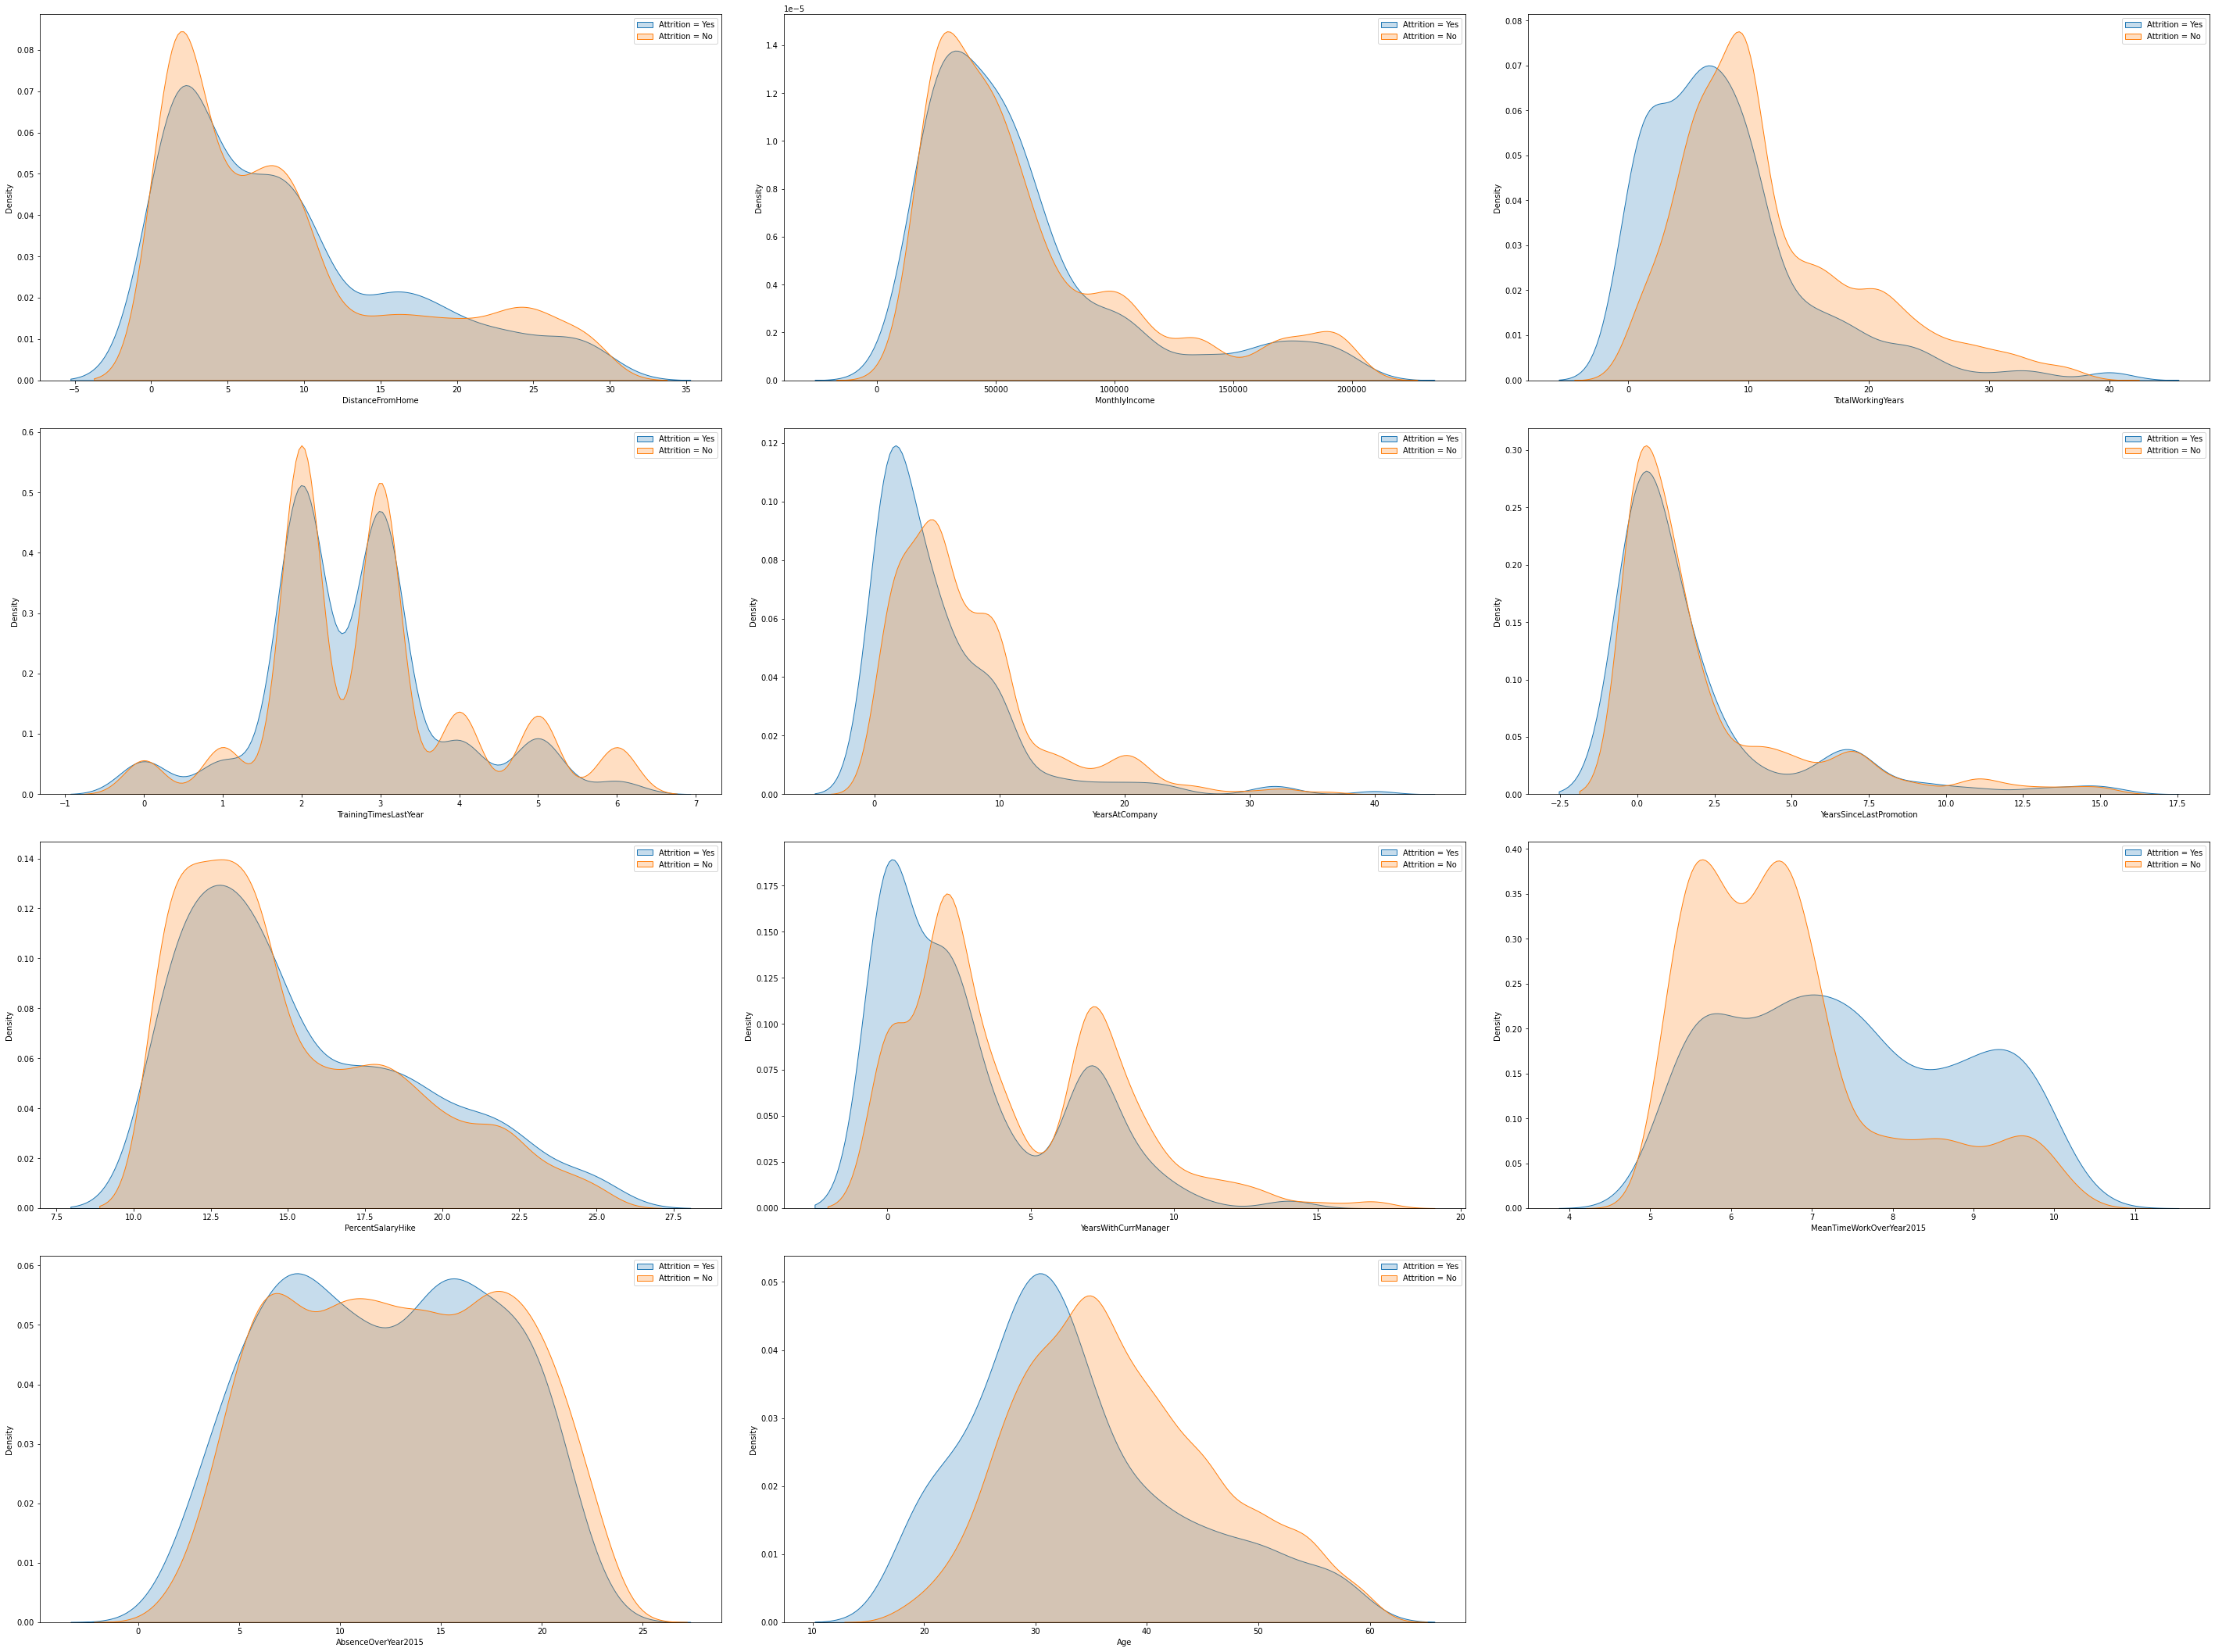

In [28]:
def area_chart(df,feature):
    ax=sns.kdeplot(df[df['Attrition']=='Yes'][feature],
             shade=True,label='Attrition = Yes')
    ax=sns.kdeplot(df[df['Attrition']=='No'][feature],
                 shade=True,label='Attrition = No')
    ax.legend()

cols = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','PercentSalaryHike','YearsWithCurrManager','MeanTimeWorkOverYear2015','AbsenceOverYear2015', "Age"]

plt.figure(figsize=(40,30))
for i, col in enumerate(cols):
    ax = plt.subplot(4, 3, i+1)
    area_chart(final_data, col)
plt.tight_layout(pad=3.0)
plt.show()

Analyse des histogrammes: 

1. MonthlyIncome : Il est clair que les employés qui ont un revenu plus élevé restent plus longtemps dans l'entreprise.

2. PercentSalaryHike : Les employés dont les revenus augmentent davantage restent plus longtemps dans l'entreprise.

3. TrainingTimesLastYear : Aucune tendance dans l'attrition par rapport au nombre de formations.

4. AbsencesPerDay : Aucune tendance dans l'attrition par rapport au nombre de jours d'absence.

5. MeanTimeWorkOverYear2015 : Il y a une tendance claire, les employés qui travaillent plus d'heures ont le taux d'attrition le plus élevé.

6. YearsAtCompany : Les employés qui restent plus longtemps dans l'entreprise ont un taux d'attrition plus faible.

7. YearSinceLastPromotion : Aucune tendance dans l'attrition par rapport au nombre d'années depuis la dernière promotion.

Cependant comme nous voyons peu de différence à l'oeil nu, nous allons dans un deuxième temps des boites à moustache.

#### Boîtes à moustache

A l'aide de boites à moustache, nous regardons la répartition des valeurs quantitatives pour chaque variables en fonction de l'attrition.

In [29]:
cols = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','PercentSalaryHike','YearsWithCurrManager','MeanTimeWorkOverYear2015','absences_par_jour']

plot_rows=2
plot_cols=5
fig = make_subplots(rows=plot_rows, cols=plot_cols,subplot_titles=(cols))

col_i = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        for t in px.box(final_data, x="Attrition", y=cols[col_i]).data:
            fig.add_trace(t,row=i, col=j)

        col_i=col_i+1
fig.update_layout(height=600, width=1200)
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MeanTimeWorkOverYear2015', 'AbsenceOverYear2015', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'] but received: absences_par_jour

#### Histogrammes

A l'aide des histogrammes, nous regardons la répartition des valeurs qualitatives pour chaque variables en fonction de l'attrition.

In [ ]:
cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

attrition = final_data['Attrition'].tolist()
result = {}

for col in cols:
    current_col = final_data[col].tolist()

    #values = {name: "", [0,1]}
    values = {}
    label = []
    list_yes = []
    list_no = []

    for index in range(len(current_col)):

        try:
            i = label.index(current_col[index])
        except:
            i = -1
        
        # On ajoute
        if(i != -1):
            if(attrition[index] == 'Yes'):
                list_yes[i] += 1
            else:
                list_no[i] += 1
        # On créée
        else:
            label.append(current_col[index])
            if(attrition[index] == 'Yes'):
                list_yes.append(1)
                list_no.append(0)
            else:
                list_yes.append(0)
                list_no.append(1)
    
    pourcent_yes = []
    pourcent_no = []

    for j in range(len(list_yes)):
        no = list_no[j]
        yes = list_yes[j]
        total = no + yes
        pourcent_yes.append("{}%".format(round(100 * yes / total)))
        pourcent_no.append("{}%".format(round(100 * no / total)))
    
    plot_rows=7
    plot_cols=2
    fig = go.Figure()

    fig.add_trace(go.Bar(
                        name='Yes',
                        x=label,
                        y=list_yes,
                        offsetgroup=0,
                        text = pourcent_yes,
                        marker_color="steelblue",
                    ))
    fig.add_trace(go.Bar(
                        name='No',
                        x=label,
                        y=list_no,
                        offsetgroup=1,
                        text = pourcent_no,
                        marker_color="coral",
                    ))
    fig.update_layout(height=500, width=800, title="Attrition for {}".format(col))
    fig.show()

Afin de mieux comprendre nos histogrammes, nous les détaillons.

1. BusinessTravel : On observe une grosse tendance des employés qui voyages fréquemment ont plus de chance de quitter l'entreprise comparé aux employés qui ne voyagent.

2. Departement : Les employés dans le département HR ont plus de chance de quitter l'entreprise que les autres employés dans les autres départements.

3. Education : Ici le niveau d'éducation ne paraît pas significatif concernant les chances qu'un employé quitte l'entreprise.

4. EducationField : Comme pour le département HR, les employés qui ont étudié dans le domaine HR ont plus de chance de quitter l'entreprise.

5. JobLevel : Le niveau hiérarchique d'un employé n'affecte presque pas l'attrition d'un employé. Mais on peut constater une légère réduction de l'attrition si un employé a un plus haut niveau hiérarchique élevé.

6. JobRole : Research Director et Research Scientist ont tendende à avoir une plus grande attrition que le reste des autre métiers dans l'entreprise. Le métier de Sale Executives tend vers une attrition légèrement élevée.

7. NumCompaniesWorked : Il n'y a pas de tendance claire dans l'attrition par rapport au nombre d'entreprises dans lesquelles les employés ont travaillé. Cependant, les employés qui ont travaillé dans plus de 4 entreprises sont plus enclins à quitter l'entreprise.

8. JobInvolvement : Les employés qui s'impliquent peu dans leur travail ont tendance à avoir un pourcentage d'attrition plus élevé.

9. EnvironmentSatisfaction : L'attrition diminue lorsque la satisfaction de l'environnement augmente. En effet on remarque que l'attrition est très élevé si la satisfaction de l'environnement est faible.

10. JobSatisfaction : L'attrition diminue lorsque la satisfaction au travail augmente.

11. WorkLifeBalance : Les employés ayant un mauvais équilibre entre vie professionnelle et vie privée ont un pourcentage d'attrition plus élevé.

<a id="section_4_1"></a>
### Analyste des données entrantes

Maintenant que nous avons vu les répercutions de l'attrition sur nos données, nous regardons plus en détails nos données entrantes ainsi que leur corrélation.

#### Histogramme 

Concernant les données quantitatives, nous affichons nos valeurs de façon visuelle afin d'avoir un meilleur appercu de l'allure de nos données.

In [ ]:
final_data.hist(bins=50, figsize=(20,15))
plt.show()

#### Corrélation des données

Maintenant nous voulons voir si nos valeurs possèdent des liens entre-elles. Pour cela nous utilisons une matrice de corrélation. Elle permet d'évaluer la dépendence entre plusieurs variables en même temps. Le résultat est une table contenant les coefficients de corrélation entre chaque variable et les autres.


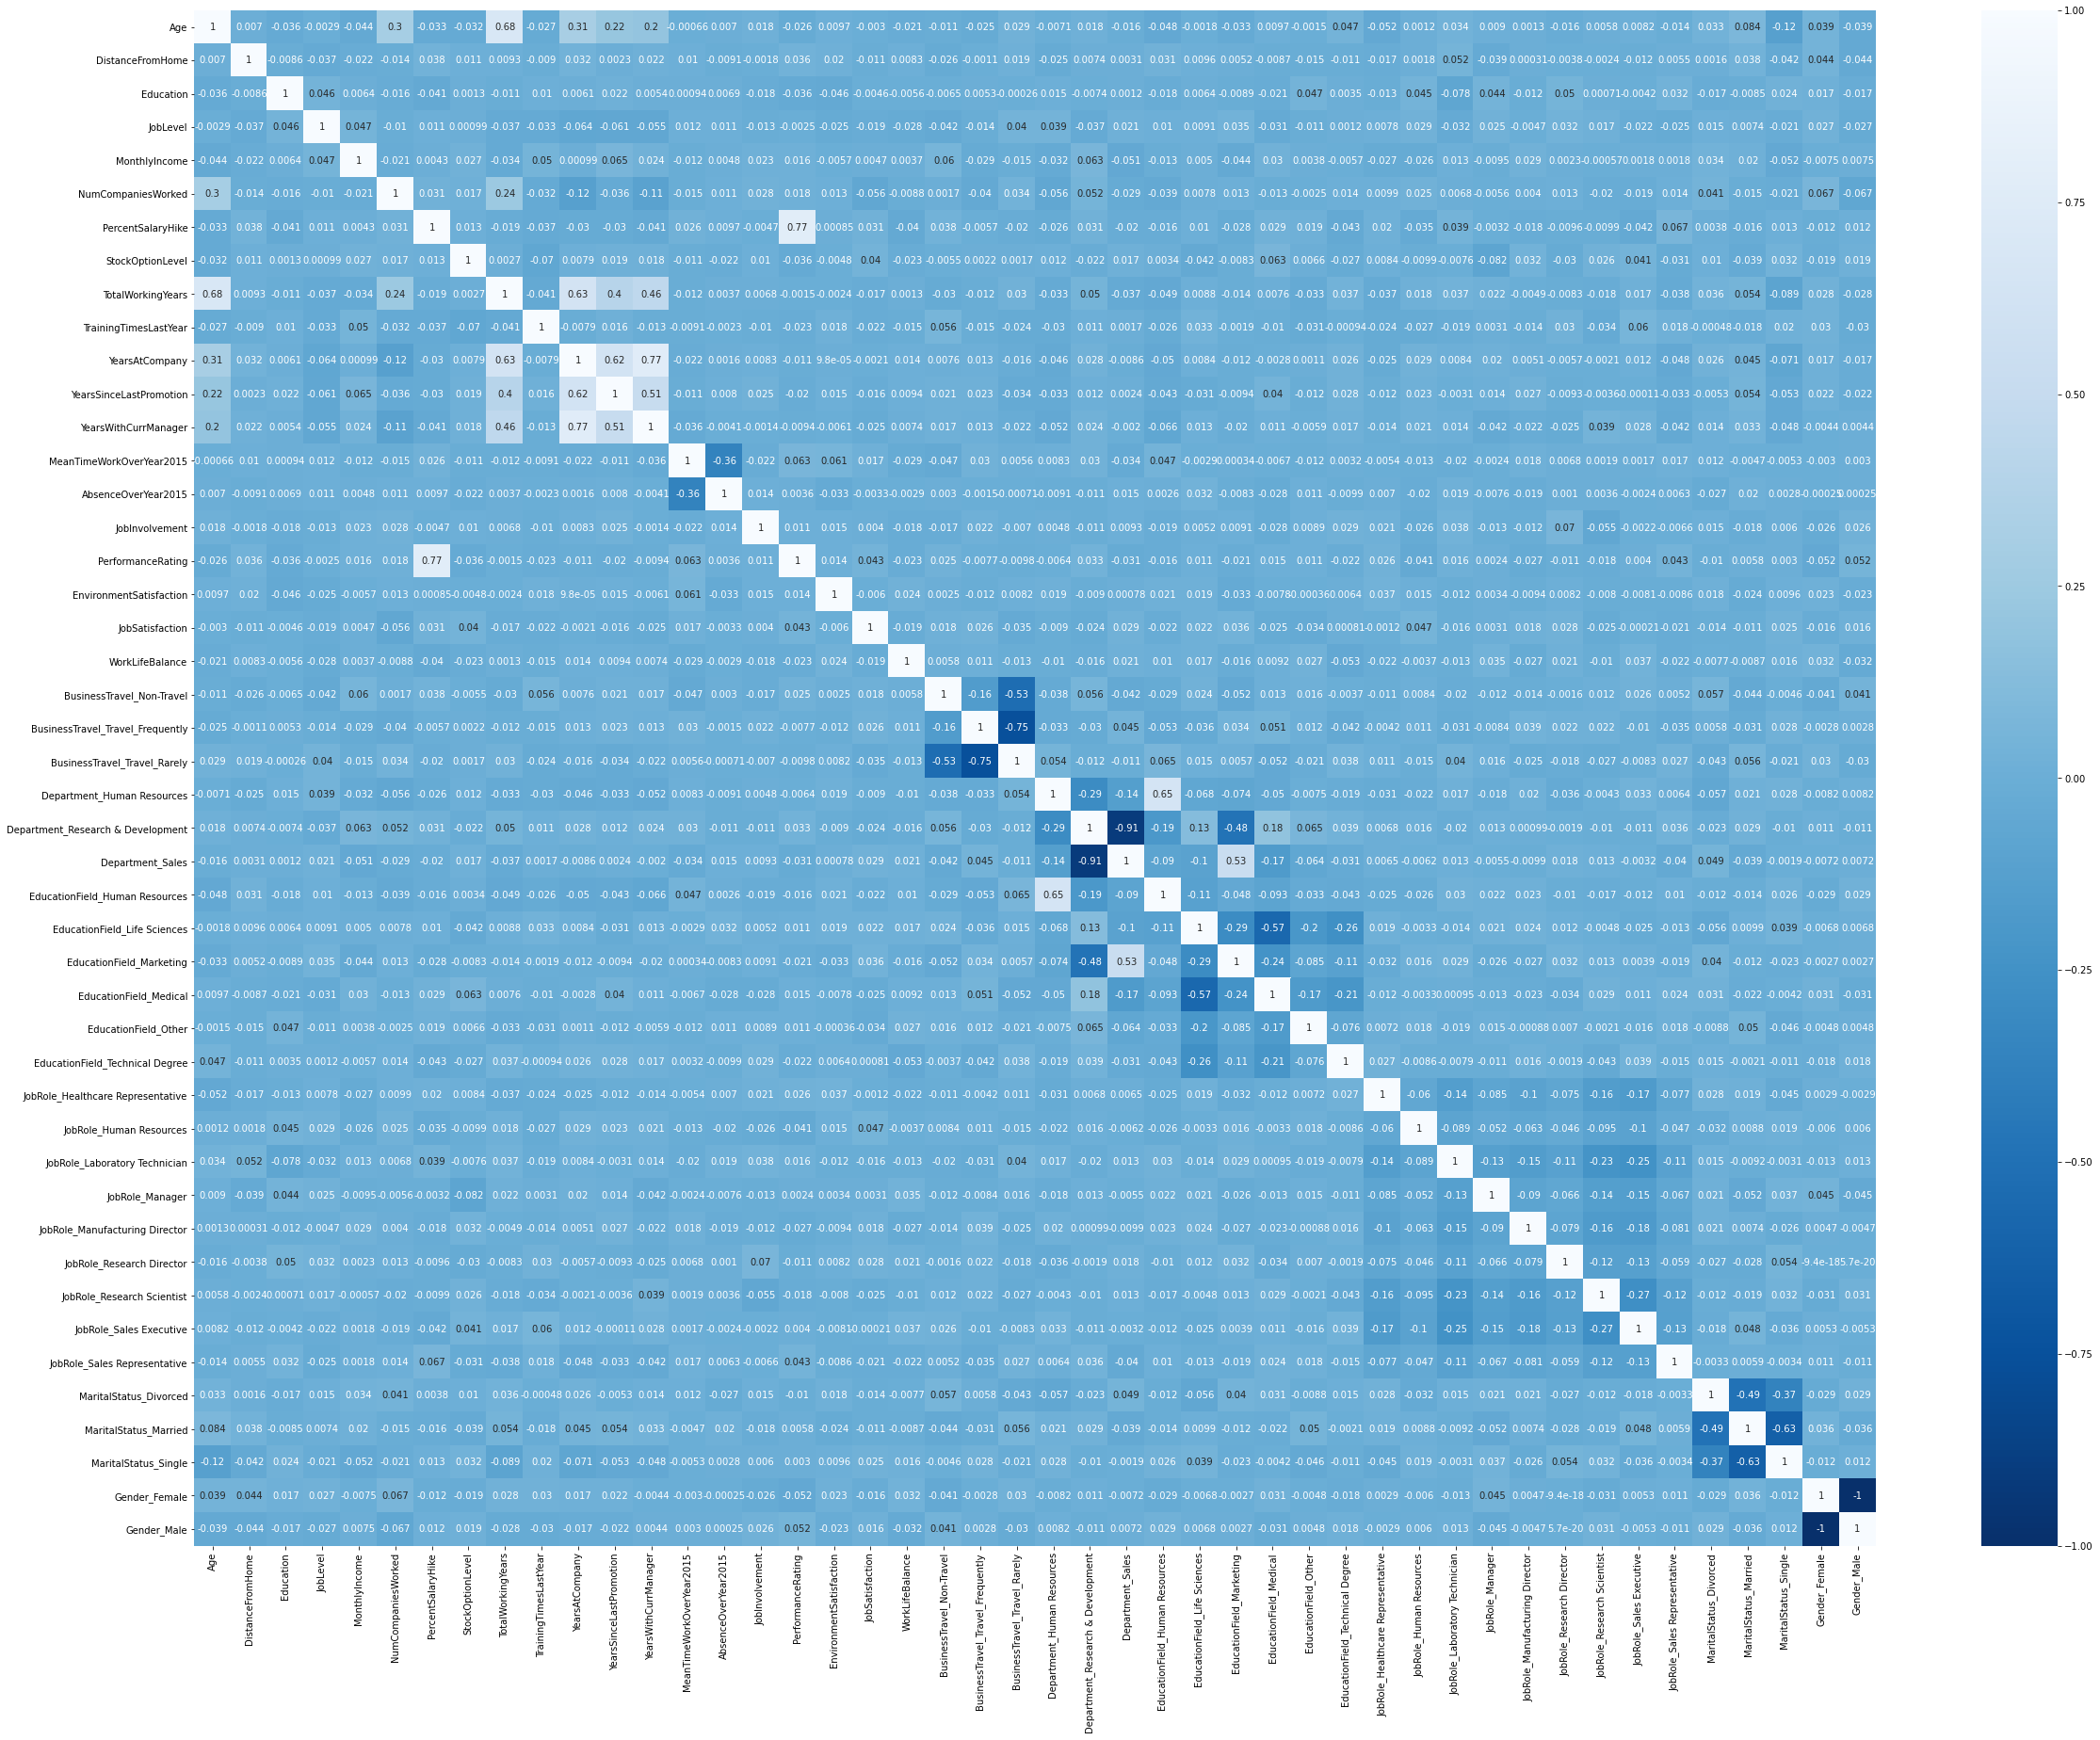

,feature1,feature2,Correlation
2114,Gender_Male,Gender_Female,1.00
1174,Department_Sales,Department_Research & Development,0.91
562,YearsWithCurrManager,YearsAtCompany,0.77
742,PerformanceRating,PercentSalaryHike,0.77
1033,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,0.75


In [30]:
# Matrice de corrélation
corr_matrix = final_data2.corr(method="pearson")

plt.figure(figsize=(40,30))
sns.heatmap(corr_matrix, annot= True, cbar=True, cmap="Blues_r")
plt.show()

corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_matrix = corr_matrix.unstack().reset_index()
corr_matrix.columns = ["feature1", "feature2", "Correlation"]
corr_matrix.dropna(subset = ['Correlation'], inplace = True)
corr_matrix['Correlation'] = round(corr_matrix['Correlation'], 2)
corr_matrix['Correlation'] = abs(corr_matrix['Correlation'])
corr_matrix = corr_matrix.sort_values(by = 'Correlation', ascending = False)
value_high_corr = corr_matrix[corr_matrix['Correlation']>0.7]

value_high_corr

On parle de corrélation quand le coefficient de corrélation est au-dessus de 0.7. On voit ici que plusieurs colonnes corrèlent entre-elles. Afin d'éviter de biaiser notre modèle à cause de la multi-collinéarité. Il faudra donc supprimer certaines colonnes. En fonction des études statistiques, nous avons choisis de garder : 

* Department_Research & Development
* YearsAtCompany
* PercentSalaryHike
* BusinessTravel_Travel_Frequently

## Conclusion des analyses

Pour conclure sur cette partie, nous remarquons que les employés des ressources humaines sont très enclins à démissionner avec un taux d'attrition de 30%. De même pour les employés ayant une formation en ressources humaines ont un taux d'attrition de 41%.

31% des employés qui ont démissionné avaient un mauvais équilibre entre vie professionnelle et vie privée.

Les employés qui voyagent fréquemment sont également très enclins à démissionner, avec un taux d'attrition de 25 %.

Les employés des niveaux inférieurs démissionnent plus souvent que les employés des niveaux supérieurs.

Les employés du département de recherche (directeurs de recherche et chercheurs) sont également enclins à démissionner, avec un taux d'attrition moyen de 21%.

Les employés qui ont travaillé dans plus de 4 entreprises ont un taux d'attrition beaucoup plus élevé que les autres.

L'attrition diminue avec l'augmentation de la satisfaction environnementale, de la satisfaction au travail et de l'implication dans le travail.

<a id="chapter5"></a>
# Algorithmes

Afin de trouver le modèle offrant les meilleures performances dans notre cas, nous allons en tester plusieurs et selectionner le modèle aillant les meileurs résultats. Les modèles testés sont :

* La regression Logistique
* L Méthode des k plus proches voisins (KNN)
* Le Random Forest Classifier
* Le Perceptron
* La Descente de Gradient Stochastique



In [31]:
# Creation d'un jeu d'entrainement labelisé
y_train_label = y_train.copy()
y_train_label.where(y_train_label == "Yes", 0, inplace=True)
y_train_label.where(y_train_label == 0, 1, inplace=True)
y_train_label = y_train_label.astype(np.int64)

# Creation d'un jeu de test labelisé
y_test_label = y_test.copy()
y_test_label.where(y_test_label == "Yes", 0, inplace=True)
y_test_label.where(y_test_label == 0, 1, inplace=True)
y_test_label = y_test_label.astype(np.int64)

In [32]:
# Listes des algorithmes  
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Perceptron": Perceptron(),
          "Descente de gradient": SGDClassifier()}

# Fonction appliquant un fit et score sur chacun des modeles
def fit_and_score(models, X_train, y_train_label):
    
    # Fixer un seed pour avoir les mêmes résultats à chaque essai 
    np.random.seed(42)
    
    # Dictionnaire pour sauvegarder les scores
    fitted_model = {}
    for name, model in models.items():
        # Fit le modèle
        model.fit(X_train, y_train_label)
        fitted_model[name] = model
        
    return fitted_model

In [33]:
# Entrainement de nos algorithmes
fitted_model = fit_and_score(models=models, X_train=X_train, y_train_label=y_train_label)
fitted_model

{'Logistic Regression': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Perceptron': Perceptron(),
 'Descente de gradient': SGDClassifier()}

<a id="chapter6"></a>

# Evaluation des modèles

Maitenant que nous avons entrainer nos modèles, il est temps de voir s'ils sont performants. 

<a id="section_6_1"></a>
### Première évaluation

Nous allons évaluer nos différents modèles en utilisant notre jeu d'entrainement. Pour cela nous allons calculer les valeurs de plusieurs variables pour notre modèle : 
* precision score : La précision permet de connaître le nombre de prédictions positifs bien effectuées.
* recall score : Le recall permet de savoir le pourcentage de positifs bien prédit par notre modèle.
* f1 score : Le f1 score fait une moyenne harmonique entre la précision et le recall.

In [34]:
 def recall_precision(estimator_train, X_train, y_true_train):
    # Print les infos de base (précision, recall, f1...)
    y_pred_train = cross_val_predict(estimator_train, X_train, y_true_train, cv=7)
    precision_train = precision_score(y_true_train, y_pred_train)
    recall_train = recall_score(y_true_train, y_pred_train)
    f1_train = f1_score(y_true_train, y_pred_train)
        
    return precision_train, recall_train, f1_train


# Jeu d'entrainement 
precision_reglog, recall_reglog, f1_reglog = recall_precision(fitted_model['Logistic Regression'], X_train, y_train_label)
precision_knn, recall_knn, f1_knn = recall_precision(fitted_model['KNN'], X_train, y_train_label)
precision_rf, recall_rf, f1_rf = recall_precision(fitted_model['Random Forest'], X_train, y_train_label)
precision_perceptron, recall_perceptron, f1_perceptron = recall_precision(fitted_model['Perceptron'], X_train, y_train_label)
precision_dgs, recall_dgs, f1_dgs = recall_precision(fitted_model['Descente de gradient'], X_train, y_train_label)

data_param = {
    'Algorithmes': ["Logisitic Regression", "KNN", "RandomForest", "Perceptron", "Descente de gradient stochastique"],
    'precision_train': [precision_reglog, precision_knn, precision_rf, precision_perceptron, precision_dgs],
    'recall_train': [recall_reglog, recall_knn, recall_rf, recall_perceptron, recall_dgs],
    'f1_train': [f1_reglog, f1_knn, f1_rf, f1_perceptron, f1_dgs]
}
hyperparameter = pd.DataFrame(data=data_param)
hyperparameter

,Algorithmes,precision_train,recall_train,f1_train
0,Logisitic Regression,0.619289,0.214035,0.318123
1,KNN,0.583893,0.305263,0.400922
2,RandomForest,0.991786,0.847368,0.913907
3,Perceptron,0.355049,0.382456,0.368243
4,Descente de gradient stochastique,0.415254,0.257895,0.318182



<a id="section_6_2"></a>

## Hyperparameter tuning

Maintenant, nous allons voir s'il est possible d'optimiser les paramétrages des algorithmes pour améliorer nos scores.

Nous utisons la fonction GridSearchCV  pour automatiser ce travail. Il faut lui fournir les valeurs à tester pour chaque hyperparamètre. Toutes les combinaisons sont évaluées par _cross-validation_.


In [35]:
#Données de paramètres

param_reglog = [
    {'solver': ['newton-cg', 'liblinear'],
    'penalty': ['none', 'l1', 'l2']}
]

param_knn = [
    {'n_neighbors' : range(1,10),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']}
]

param_random_forest = [
    {'n_estimators' : [10, 50, 100, 200],
    'max_depth' : [10, 20, 40, 50],
    'max_features': [1, 'auto', 'log2'],
    'bootstrap': [True, False]}
]

param_perceptron = [
    {'penalty' : ['l1', 'l2'],
    'fit_intercept': [True, False],
    'max_iter': [20, 50, 70, 100]}
]

param_descente = [
    {'learning_rate': ['optimal'],
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.3, 0.5],
    'loss': ['log', 'perceptron'],
    'penalty': ['l1', 'l2']}
]

Détails des paramètres pris en compte pour la suite de nos entrainements de modèles: 

##### Param reglog 
* Solver :  
    * Newton-cg : La méthode de Newton utilise en un sens une meilleure minimisation de la fonction quadratique. Une meilleure car elle utilise l'approximation quadratique (c'est-à-dire les dérivées partielles premières ET secondes) lors de la descende de gradient.

    * Liblinear : Solveur qui utilise un algorithme de descende par coordonnées. Recommandé pour résoudre des problèmes de classification avec peu de données.

* Penalty :  Forme de régularisation (éviter l’overfitting), et ajouter une pénalité sur les coeff de régression à forte valeur.
    * L1: Lasso regression, qui ajoute une pénalité égale à la valeur absolue des coeffs. Limite la taille des coeffs.

    * L2 : Ridge regression, qui ajoute une pénalité égale au carré de la taille des coeffs.

##### Param knn 
* Neigbors : Nombre de voisins

* Weights : Poids ajouté sur toutes les valeurs de nos voisins
    * Uniform : Cette valeur fera en sorte que les poids soient distribués de manière égale entre toutes les valeurs voisines.
    * Distance : Cette valeur fera en sorte que les poids soient distribués en fonction de leur distance. Les voisins les plus proches auront un poids plus élevé dans l'algorithme.
* Metric : 
     * Euclidean : sqrt(sum((x - y)^2))
     * Manhattan : sum(|x - y|)

##### Param random_forest :
* N estimators :  Nombre d’arbres dans notre forêt

* Max depth :  Nombre maximum de niveau dans chaque arbre de décision

* Max features :  Nombre maximum de features prise en compte pour la division d’un noeud

* Bootstrap :  Méthode d’échantillonnages des points de données (avec ou sans remplacement)

##### Param preceptron :
* Penalty 

* Fit intercept :  C’est est un biais (valeur), qui est ajouté à la somme pondérée des entrées et des poids d'un perceptron, qui peut augmenter la précision du modèle. Réglé à true ou false.

* Max iter : Nombre d’itération pour entrainer nos epochs (nb d’itération où le modèle voit tout le training set pour mettre à jour ses coeff).

##### Param descente de gradient stochastique (mini-batch size) : 

* Learning_rate : Vitesse d’apprentissage

* Early stopping :  

* Validation fraction : La proportion de données de train à mettre de côté comme validation

* Loss : 
    * Log : fonction de coût de la regression logistique
    * 	Perceptron : fonction de coût du perceptron

* Penalty



In [36]:
# Fonction calculant la meilleure prediction avec les meilleurs paramètres
def fit_method(gs_cv, X, y):
    gs_cv.fit(X, y)
    gs_cv_best_score = gs_cv.best_score_
    gs_cv_best_param = gs_cv.best_params_
    gs_cv_best_estimator = gs_cv.best_estimator_
    gs_cv_score = cross_val_score(gs_cv_best_estimator, X, y, cv=10).mean()
    
    return gs_cv_best_score, gs_cv_best_param, gs_cv_best_estimator, gs_cv_score


### Regression hyperparameter tuning

In [37]:
# Grid Search
gs_cv_reglog = GridSearchCV(LogisticRegression(), param_reglog, cv=10,return_train_score=False, verbose=0)

# Jeu de test
reglog_best_score_test, reglog_best_param_test, reglog_best_estimator_test, cv_score_reglog_test =  fit_method(gs_cv_reglog, X_test, y_test_label)
print('reglog_best_score_test:',reglog_best_score_test)

# Jeu d'entrainement
reglog_best_score_train, reglog_best_param_train, reglog_best_estimator_train, cv_score_reglog_train =  fit_method(gs_cv_reglog, X_train, y_train_label)
print('reglog_best_score_train:',reglog_best_score_train)


reglog_best_score_test: 0.8492339121552606
reglog_best_score_train: 0.8528900012876642


### KNNeighboors hyperparameter tuning

In [38]:
# Grid Search
gs_cv_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=10,return_train_score=False, verbose=0)

# Jeu de test
knn_best_score_test, knn_best_param_test, knn_best_estimator_test, cv_score_knn_test =  fit_method(gs_cv_knn, X_test, y_test_label)
print('knn_best_score_test:', knn_best_score_test)

# Jeu d'entrainement
knn_best_score_train, knn_best_param_train, knn_best_estimator_train, cv_score_knn_train =  fit_method(gs_cv_knn, X_train, y_train_label)
print('knn_best_score_train:', knn_best_score_train)


knn_best_score_test: 0.8855081716036771
knn_best_score_train: 0.9846912825135204


### Random Forest hyperparameter tuning

In [39]:
# Grid Search
gs_cv_rf = GridSearchCV(RandomForestClassifier(), param_random_forest, cv=10,return_train_score=False, verbose=0, n_jobs=-1)

# Jeu de test
rf_best_score_test, rf_best_param_test, rf_best_estimator_test, cv_score_rf_test =  fit_method(gs_cv_rf, X_test, y_test_label)
print('rf_best_score_test:', rf_best_score_test)

# Jeu d'entrainement
rf_best_score_train, rf_best_param_train, rf_best_estimator_train, cv_score_rf_train =  fit_method(gs_cv_rf, X_train, y_train_label)
print('rf_best_score_train:', rf_best_score_train)

rf_best_score_test: 0.8956843718079673
rf_best_score_train: 0.9889445982487766


### Perceptron hyperparameter tuning

In [40]:
# Grid Search
gs_cv_perceptron = GridSearchCV(Perceptron(), param_perceptron, cv=10,return_train_score=False, verbose=0)

# Jeu de test
perceptron_best_score_test, perceptron_best_param_test, perceptron_best_estimator_test, cv_score_perceptron_test =  fit_method(gs_cv_perceptron, X_test, y_test_label)
print('perceptron_best_score_test:', perceptron_best_score_test)

# Jeu d'entrainement
perceptron_best_score_train, perceptron_best_param_train, perceptron_best_estimator_train, cv_score_perceptron_train =  fit_method(gs_cv_perceptron, X_train, y_train_label)
print('perceptron_best_score_train:', perceptron_best_score_train)

perceptron_best_score_test: 0.7969994892747702
perceptron_best_score_train: 0.7964597283028587


### Descente de Gradient Stochastique hyperparameter tuning

In [41]:
# Grid Search
gs_cv_dgs = GridSearchCV(SGDClassifier(), param_descente, cv=10,return_train_score=False, verbose=0)

# Jeu de test
dgs_best_score_test, dgs_best_param_test, dgs_best_estimator_test, cv_score_dgs_test =  fit_method(gs_cv_dgs, X_test, y_test_label)
print('dgs_best_score_test:', dgs_best_score_test)

# Jeu d'entrainement
dgs_best_score_train, dgs_best_param_train, dgs_best_estimator_train, cv_score_dgs_train =  fit_method(gs_cv_dgs, X_train, y_train_label)
print('dgs_best_score_train:', dgs_best_score_train)

dgs_best_score_test: 0.8106358529111338
dgs_best_score_train: 0.8072471349472057


### Résumé

In [42]:
data_param = {
    'Algorithmes': ["Logisitic Regression", "KNN", "RandomForest", "Perceptron", "Descente de gradient stochastique"],
    'Best_param': [reglog_best_param_train, knn_best_param_train, rf_best_param_train, perceptron_best_param_train, dgs_best_param_train],
    'Best_estimator': [reglog_best_estimator_train, knn_best_estimator_train, rf_best_estimator_train, perceptron_best_estimator_train, dgs_best_estimator_train],
    'Cross-Validation score Train': [cv_score_reglog_train, cv_score_knn_train, cv_score_rf_train, cv_score_perceptron_train, cv_score_dgs_train]
}
hyperparameter = pd.DataFrame(data=data_param)
hyperparameter

,Algorithmes,Best_param,Best_estimator,Cross-Validation score Train
0,Logisitic Regression,"{'penalty': 'none', 'solver': 'newton-cg'}","LogisticRegression(penalty='none', solver='new...",0.852890
1,KNN,"{'metric': 'manhattan', 'n_neighbors': 4, 'wei...","KNeighborsClassifier(metric='manhattan', n_nei...",0.984691
2,RandomForest,"{'bootstrap': False, 'max_depth': 40, 'max_fea...","(DecisionTreeClassifier(max_depth=40, max_feat...",0.988378
3,Perceptron,"{'fit_intercept': True, 'max_iter': 20, 'penal...","Perceptron(max_iter=20, penalty='l1')",0.796460
4,Descente de gradient stochastique,"{'early_stopping': True, 'learning_rate': 'opt...","SGDClassifier(early_stopping=True, loss='perce...",0.767577


Voici le tableau récapitulatif avec pour chaque algorithme les meilleurs paramètres ainsi que leur score.

<a id="section_6_3"></a>

## Deuxième évaluation

On cherche ici à mesurer les performances des différentes algorithmes pour définir lequel est le plus adapté à notre problème. Pour cela nous allons définir des fonctions permettant d'afficher des courbes (Précision/Recall, ROC...).

In [52]:
# On définie ici nos fonctions pour plot et de transfo
# Convertir une liste avec des 'No' & 'Yes' en 0 & 1 liste
def transform_binary(table):
    y_pred_binary = []
    
    for item in table:
        if item == 'No':
            y_pred_binary.append(0)
        else:
            y_pred_binary.append(1)
    return y_pred_binary

# Plot courbes de précision et recall vs Threshold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

# Plot courbes de précision et recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

# Plot de la courbe de Roc
def plot_roc_curve(fpr, tpr, label=None):
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [44]:
# Affiche les informations pour un modèle donnée
def displayInfo_by_model(estimator_train, estimator_test, X_train, y_true_train, X_test, y_true_test, method, xlim_x, xlim_y, ylim_x, ylim_y ):
    # Fix random
    np.random.seed(42)

    # Print les infos de base (précision, recall, f1...)
    y_pred_train = cross_val_predict(estimator_train, X_train, y_true_train, cv=7)
    precision_train = precision_score(y_true_train, y_pred_train)
    recall_train = recall_score(y_true_train, y_pred_train)
    f1_train = f1_score(y_true_train, y_pred_train)
    
    y_pred_test = cross_val_predict(estimator_test, X_test, y_true_test, cv=7)
    precision_test = precision_score(y_true_test, y_pred_test)
    recall_test = recall_score(y_true_test, y_pred_test)
    f1_test =  f1_score(y_true_test, y_pred_test)
    
    data_train_test = {
    'Analyse': ["precision_score", "recall_score", "f1_score"],
    "Jeu d'entrainement": [precision_train, recall_train, f1_train],
    "Jeu de test": [precision_test, recall_test, f1_test],
    'Différence': [precision_train - precision_test, recall_train - recall_test, f1_train - f1_test]
    }
        
    result_train_test = pd.DataFrame(data=data_train_test)
    display(result_train_test)
    
    # matrice de confusion
    print("Matrice de confusion jeu d'entrainement:\n", metrics.confusion_matrix(y_true_train, y_pred_train))
    print("Matrice de confusion jeu de test:\n", metrics.confusion_matrix(y_true_test, y_pred_test))
    
    # Afficher courbes
    y_scores = cross_val_predict(estimator_train, X_train, y_true_train, cv=7,method=method)
    if(method == 'predict' or method == 'predict_proba'):
        y_scores = y_scores[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_true_train, y_scores)

    plt.figure(figsize=(8, 4))
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.xlim([xlim_x,xlim_y])
    plt.ylim([ylim_x,ylim_y])
    plt.show()

    plt.figure(figsize=(8, 6))
    plot_precision_vs_recall(precisions, recalls)
    plt.show()   

    fscore = (2 * precisions * recalls) / (precisions + recalls)
    fpr, tpr, thresholds = roc_curve(y_true_train, y_scores)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.show()
    print('AUC = ', metrics.auc(fpr, tpr))
    
    return fpr, tpr, fscore, thresholds

Une fois les différentes fonctions définies, nous allons créer une liste de label pour évaluer nos modèles.


In [45]:
# creation d'un jeu d'entrainement labélisé
y_test_label = y_test.copy()
y_test_label.where(y_test_label == "Yes", 0, inplace=True)
y_test_label.where(y_test_label == 0, 1, inplace=True)
y_test_label = y_test_label.astype(np.int64)
y_test_label_true = (y_test_label == 1)

# creation d'un jeu de test labélisé
y_train_label = y_train.copy()
y_train_label.where(y_train_label == "Yes", 0, inplace=True)
y_train_label.where(y_train_label == 0, 1, inplace=True)
y_train_label = y_train_label.astype(np.int64)
y_train_label = (y_train_label == 1)

Nous allons donc maintenant évaluer nos différents modèles en utilisant notre jeu de test. Pour cela nous allons calculer les valeurs de plusieurs variables (precision, recall et f1 score) pour notre modèle.
De plus pour compléter cette analyse nous allons utiliser des courbes pour mieux mettre en relation les valeurs obtenues.

### Regression logistique
Nous allons donc maintenant regarder les statistiques que nous donne l'algorithme de régression logistique

,Analyse,Jeu d'entrainement,Jeu de test,Différence
0,precision_score,0.613065,0.571429,0.041637
1,recall_score,0.214035,0.198582,0.015454
2,f1_score,0.317295,0.294737,0.022558


Matrice de confusion jeu d'entrainement:
 [[2881   77]
 [ 448  122]]
Matrice de confusion jeu de test:
 [[720  21]
 [113  28]]


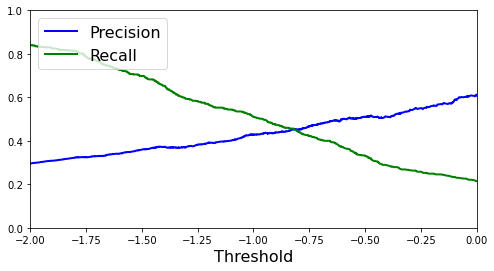

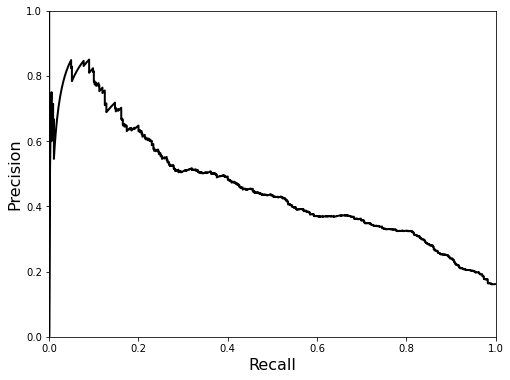

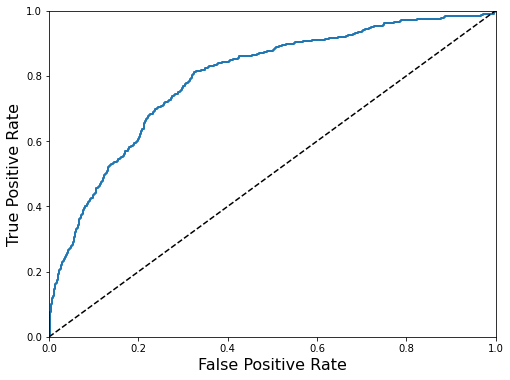

AUC =  0.793238674780257


In [46]:
fpr_reglog, tpr_reglog, fscore_reglog, thresholds_reglog = displayInfo_by_model(reglog_best_estimator_train, reglog_best_estimator_test, X_train, y_train_label, X_test, y_test_label_true,"decision_function",-2,0,0,1)

### KNN
Nous allons maintenant observer le score de notre algorithme KNN.

,Analyse,Jeu d'entrainement,Jeu de test,Différence
0,precision_score,0.960894,0.934783,0.026111
1,recall_score,0.905263,0.304965,0.600299
2,f1_score,0.932249,0.459893,0.472356


Matrice de confusion jeu d'entrainement:
 [[2937   21]
 [  54  516]]
Matrice de confusion jeu de test:
 [[738   3]
 [ 98  43]]


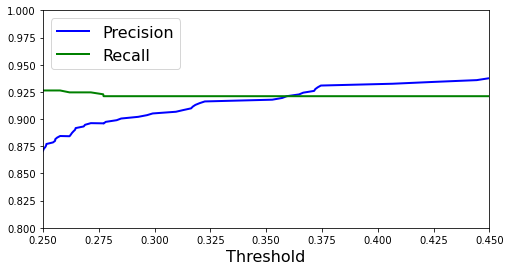

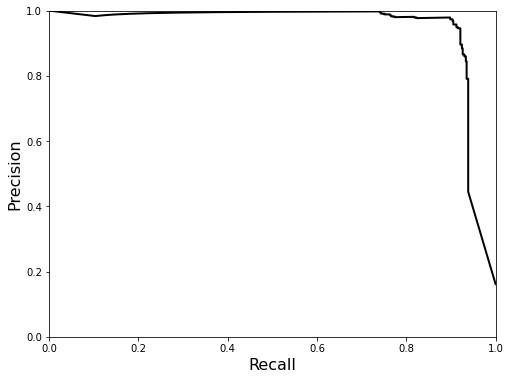

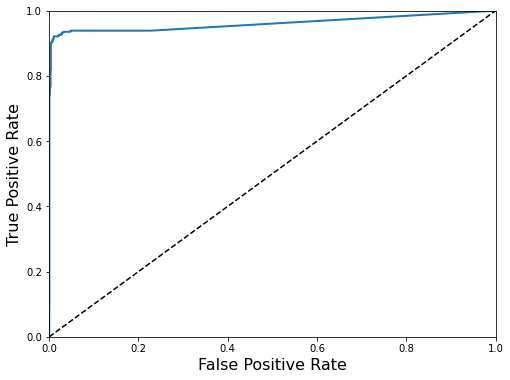

AUC =  0.9608946300843386


In [47]:
fpr_knn, tpr_knn, fscore_knn, thresholds_knn = displayInfo_by_model(knn_best_estimator_train, knn_best_estimator_test, X_train, y_train_label, X_test, y_test_label_true,"predict_proba", 0.25,0.45,0.8,1)

### Random Forest

Nous allons maintenant évaluer notre algorithme Random Forest.

,Analyse,Jeu d'entrainement,Jeu de test,Différence
0,precision_score,0.996063,0.772727,0.223336
1,recall_score,0.887719,0.361702,0.526017
2,f1_score,0.938776,0.492754,0.446022


Matrice de confusion jeu d'entrainement:
 [[2956    2]
 [  64  506]]
Matrice de confusion jeu de test:
 [[726  15]
 [ 90  51]]


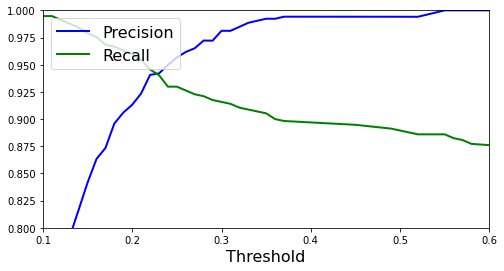

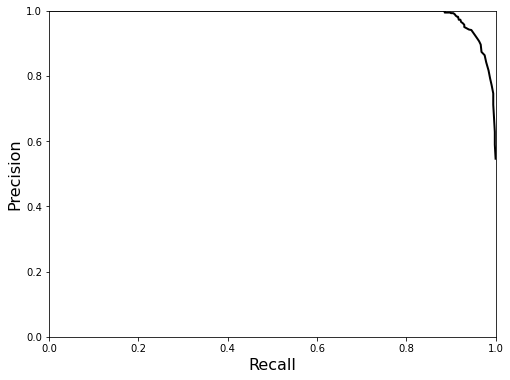

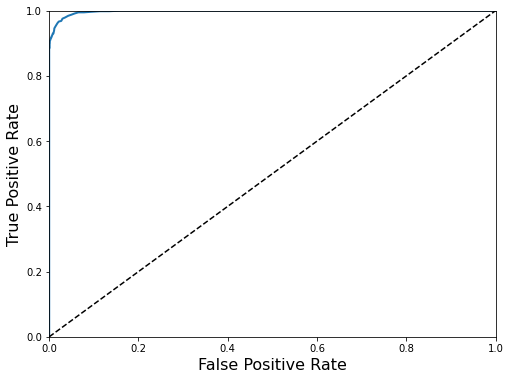

AUC =  0.9976400602588282


In [48]:
fpr_rf, tpr_rf, fscore_rf, thresholds_rf = displayInfo_by_model(rf_best_estimator_train, rf_best_estimator_test, X_train, y_train_label, X_test, y_test_label_true,"predict_proba", 0.1,0.6,0.8,1)

### Perceptron

Nous allons maintenant observer les performances de notre algorithme Perceptron.

,Analyse,Jeu d'entrainement,Jeu de test,Différence
0,precision_score,0.338798,0.367521,-0.028724
1,recall_score,0.326316,0.304965,0.021351
2,f1_score,0.332440,0.333333,-0.000894


Matrice de confusion jeu d'entrainement:
 [[2595  363]
 [ 384  186]]
Matrice de confusion jeu de test:
 [[667  74]
 [ 98  43]]


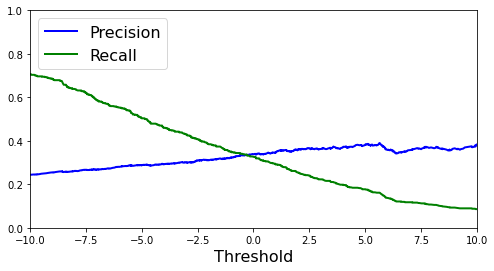

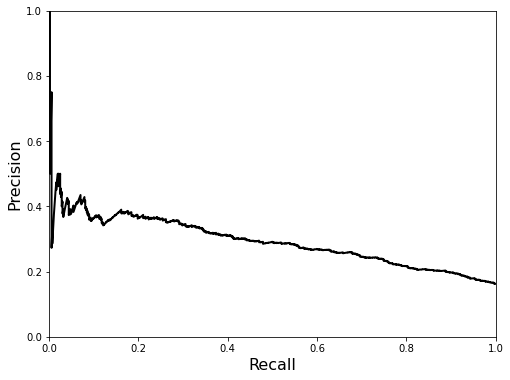

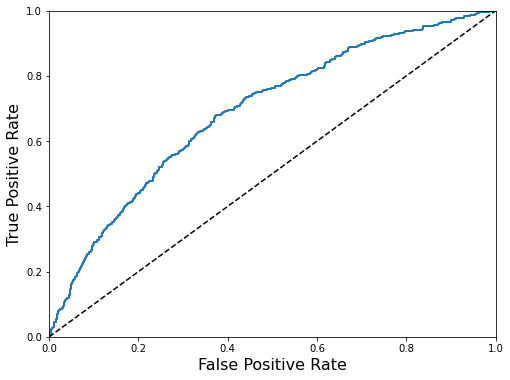

AUC =  0.6914783578283097


In [49]:
fpr_perceptron, tpr_perceptron, fscore_perceptron, thresholds_perceptron = displayInfo_by_model(perceptron_best_estimator_train, perceptron_best_estimator_test, X_train, y_train_label, X_test, y_test_label_true,"decision_function", -10,10, 0, 1)

### Descente de gradient stochastique

Nous allons maintenant observer les performances de l'algorithme des descente de gradient stochastique.

,Analyse,Jeu d'entrainement,Jeu de test,Différence
0,precision_score,0.315690,0.327869,-0.012179
1,recall_score,0.292982,0.283688,0.009295
2,f1_score,0.303913,0.304183,-0.000270


Matrice de confusion jeu d'entrainement:
 [[2596  362]
 [ 403  167]]
Matrice de confusion jeu de test:
 [[659  82]
 [101  40]]


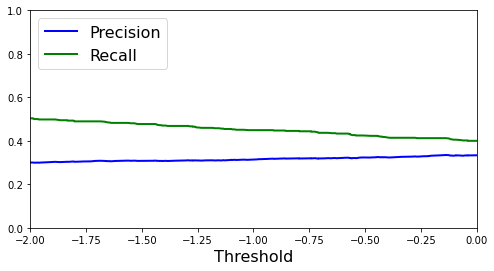

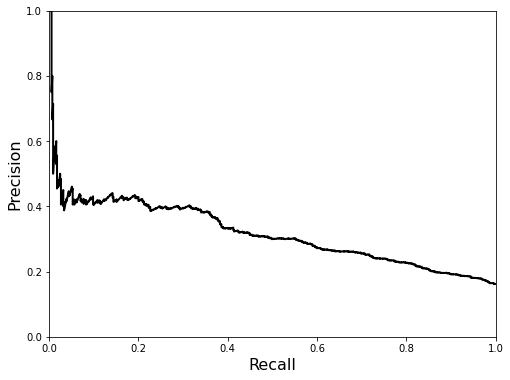

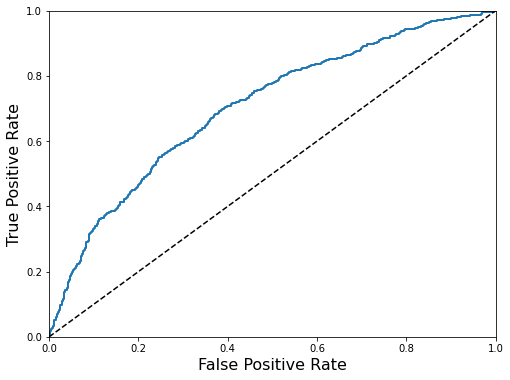

AUC =  0.7039280927131893


In [50]:
fpr_dgs, tpr_dgs, fscore_dgs, thresholds_dgs = displayInfo_by_model(dgs_best_estimator_train, dgs_best_estimator_test, X_train, y_train_label, X_test, y_test_label_true,"decision_function", -2, 0, 0,1)

<a id="section_6_4"></a>

## Comparaison des courbes ROC

Une fois les différentes statistiques affiché pour nos algorithmes, nous devons les comparer pour choisir celui qui sera le plus adapté à notre problème.

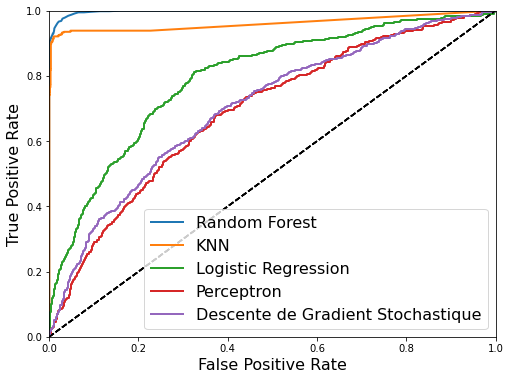

In [53]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plot_roc_curve(fpr_reglog, tpr_reglog, "Logistic Regression")
plot_roc_curve(fpr_perceptron, tpr_perceptron, "Perceptron")
plot_roc_curve(fpr_dgs, tpr_dgs, "Descente de Gradient Stochastique")
plt.legend(loc="lower right", fontsize=16)
plt.show()

Nous avons donc affiché les courbes ROC de tous nos algorithmes, nous permettant donc de sélectionner le meilleur. Ici, nous constatons sans grande surprise que l'algorithme Random Forest est le plus adapté.

In [54]:
def percentage(unique, counts):
    return (counts[1]/(counts[0]+counts[1]))*100

ix = argmax(fscore_rf)

final_model = rf_best_estimator_train
final_threshold = thresholds_rf[ix]

final_prediction = final_model.predict_proba(X_train)[:, 1]
final_prediction_set = np.where(final_prediction < final_threshold, 0, 1)

unique, counts = np.unique(final_prediction_set, return_counts=True)
dict(zip(unique, counts))


{0: 2958, 1: 570}

In [55]:
percentage(unique, counts)

16.156462585034014

Nous pouvons donc voir que notre modèle prédit correctement l'attrition sur notre jeu de données, l'attrition étant sur celui-ci de 16% pour une approximation à 15% donnée par l'entreprise auparavant.

<a id="chapter7"></a>

## Conclusion
Suite à notre prédiction, nous pouvons mettre en évidence les différentes features qui influent sur l'attrition, et donc le taux de turn-over.

In [56]:
rf_best_estimator_train.feature_importances_

array([0.06054397, 0.03631924, 0.03679454, 0.06849075, 0.04939129,
       0.05667502, 0.03054851, 0.08114009, 0.04065411, 0.07079823,
       0.04208784, 0.08023756, 0.03170984, 0.03171979, 0.04242946,
       0.04284586, 0.03539624, 0.00845799, 0.0184011 , 0.00799763,
       0.01377548, 0.00547447, 0.01234225, 0.00598787, 0.01098843,
       0.00469038, 0.0064952 , 0.00707586, 0.00347438, 0.00965039,
       0.0050706 , 0.00664056, 0.00821099, 0.01067405, 0.01107376,
       0.0057363 ])

In [57]:
feature_dict = dict(sorted(zip(X.columns, list(rf_best_estimator_train.feature_importances_)), reverse=True))
feature_dict_sorted_A = sorted(feature_dict.items(), key=lambda x:x[1], reverse=True)
feature_dict_sorted_A

[('TotalWorkingYears', 0.08114009468198877),
 ('MeanTimeWorkOverYear2015', 0.08023756249134414),
 ('YearsAtCompany', 0.07079822541857282),
 ('MonthlyIncome', 0.06849074838433365),
 ('DistanceFromHome', 0.060543968702801924),
 ('PercentSalaryHike', 0.056675022935297796),
 ('NumCompaniesWorked', 0.04939129332057729),
 ('JobSatisfaction', 0.0428458565509191),
 ('EnvironmentSatisfaction', 0.042429461818388345),
 ('YearsSinceLastPromotion', 0.042087836910063306),
 ('TrainingTimesLastYear', 0.04065410856521336),
 ('JobLevel', 0.03679453735646233),
 ('Education', 0.036319239744907875),
 ('WorkLifeBalance', 0.03539624352822322),
 ('JobInvolvement', 0.03171978549858108),
 ('AbsenceOverYear2015', 0.03170983755884846),
 ('StockOptionLevel', 0.030548511701213324),
 ('BusinessTravel_Travel_Frequently', 0.0184010972339067),
 ('Department_Research & Development', 0.01377547572918943),
 ('EducationField_Life Sciences', 0.012342247951282501),
 ('JobRole_Sales Executive', 0.011073759756276495),
 ('Educa

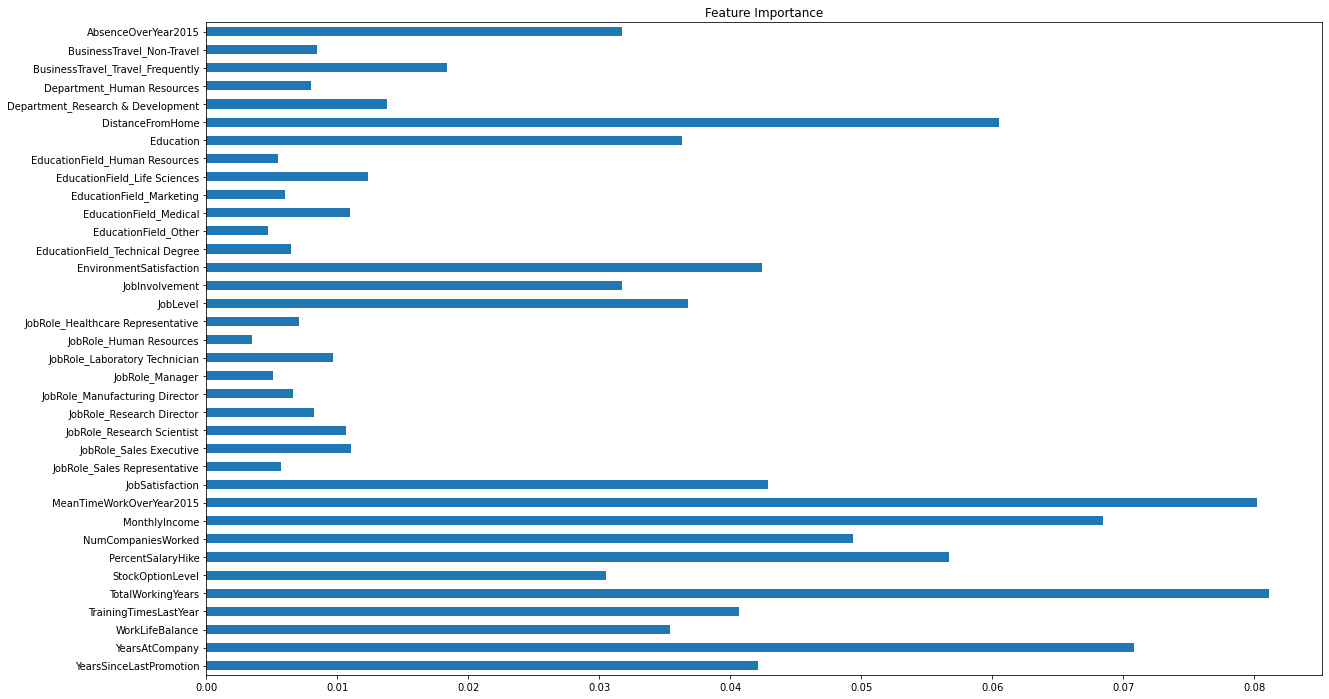

In [58]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.barh(figsize=(20,12),title="Feature Importance", legend=False);

Ces différentes fonctions nous permettent donc de mettre en évidence ces features (au dessus de 0.06), qui sont :
* MeanTimeWorkOverYear2015
* TotalWorkingYears
* MonthlyIncome
* YearsAtCompany
* DistanceFromHome

Nous allons donc parmis ces 5 features choisir celles qui peuvent être influencée par l'entreprise, `YearsAtCompany` et `TotalWorkingYears` ne permettant pas de solution facile à mettre en place nous n'allons pas les étudier ici.

### Etude des features

#### MeanTimeWorkOverYear2015

Nous allons étudier dans quels cas les employées sont plus susceptibles de quitter l'entreprise en fonction de leur temps moyen de travail.

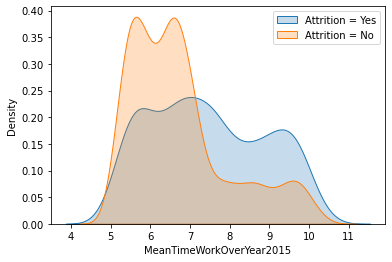

In [59]:
area_chart(final_data, 'MeanTimeWorkOverYear2015')

Nous pouvons voir les tendances suivantes grâce à ce graphique :
* Les employées dont la moyenne est comprise entre 4h à 7h de travail ont tendance à ne pas quitter l'entreprise.
* Les employées dont la moyenne est comprise entre 8h à 10h ont tendance à plus quitter l'entreprise. 

Nous allons donc simuler un réduction des horaires de travail pour observer si cela nous permet de réduire significativement l'attrition.


On peut ainsi voir que si les employées travaillent 30 minutes de moins par jour (soit 2h30 par semaines) on peut faire descendre l'attrition à **14,6%** au lieu de 16% auparavant. Cette piste est viable, car en adaptant les horaires des salariées, l'entreprise peut diminuer significativement l'attrition.

#### MonthlyIncome

Nous allons étudier dans quels cas les employées sont plus susceptibles de quitter l'entreprise en fonction de leur salaire par mois.

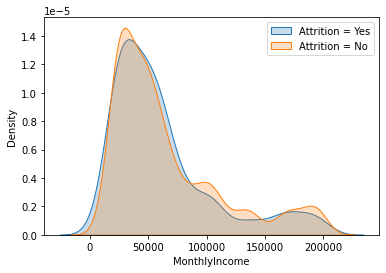

In [60]:
area_chart(final_data, 'MonthlyIncome')

Nous pouvons voir deux tendances grâce à ce graphique :
* Les employées dont le salaire est inférieur à 50000 roupies sont plus susceptible de quitter l'entreprise.
* Les employées dont le salaire est supérieur à 50000 roupies ont tendance à rester dans l'entreprise. 

Nous allons donc simuler une augmentation des salaires pour les employées ciblés pour voir si cela influera significativement notre attrition.

Une fois le modèle entrainé, en simulant une augmentation de 25% du salaire de nos employées, nous avons pu obtenir une attrition de **14.36%**. Cette piste peut donc elle aussi être mise en place par l'entreprise pour réduire son attrition.

#### DistanceFromHome

Nous allons étudier dans quels cas les employées sont plus susceptibles de quitter l'entreprise en fonction de la distance entre leurs lieux de résidences et leur travail.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29')])

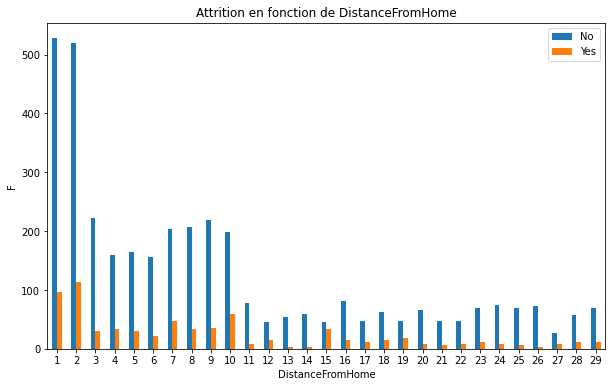

In [61]:
pd.crosstab(final_data["DistanceFromHome"], final_data.Attrition).plot(kind="bar",figsize=(10, 6))
plt.title("Attrition en fonction de DistanceFromHome")
plt.xlabel("DistanceFromHome")
plt.ylabel("F")
plt.legend(["No", "Yes"])
plt.xticks(rotation=0)

Ce graphique nous apprend que la distance entre les domiciles des salariées et l'entreprise n'influe pas sur l'attrition, seulement certains cas comme 15km et 19km. Cette feature étant que significative nous allons quand même effectuer une signification, prenant en compte la mise en place de télétravail pour les salariées à hauteur de 25%.

Nous avons pu entrainer le modèle pour obtenir les résultats suivants : **14.6%** d'attrition, en mettant 25% du temps les salariées en télétravail. Cette piste peut donc être suivit par l'entreprise pour diminuer son attrition.

### Pistes à suivre
Nous avons donc vu que trois des nos cinqs paramètres peuvent être adapté pour réduire l'attrition. Nous pouvons donc proposer des solutions pour ceux-ci :
* MeanTimeWorkOverYear2015 : Réduction de 30min/jour du temps de travail.
* TotalWorkingYears : *Pas prise en compte car les salairiés agés vont à la retraite*
* MonthlyIncome : Augmentation des salaires de 25%.
* YearsAtCompany : Mise en place de prime d'ancienneté plus conséquente.
* DistanceFromHome : Mise en place de télétravail à hauteur de 1,25j/semaine).
